# Machine Learning
## Student: Vasquez Espinoza, Luis
## Exercise 1
### Midterm exam
___
### Using _Auto_ dataset

#### **11.a Create a binary variable, mpg01, that contains a 1 if mpg contains a value above its median, and a 0 if mpg contains a value below its median. You can compute the median using the median() function. Note you may ﬁnd it helpful to use the data.frame() function to create a single data set containing both mpg01 and the other Auto variables.**

Fisrt of all, lets load the auto.csv data into python via pandas

In [1]:
import pandas as pd

file_path = 'Auto.csv'
auto_df = pd.read_csv(file_path)
auto_df = auto_df.loc[:,auto_df.columns != 'Unnamed: 0']
auto_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
388,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
389,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
390,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


Then, applying an anonimous function, we binarize those mpg values above and below it's median

In [2]:
auto_df['mpg01'] = auto_df['mpg'].apply(lambda x: 1 if x > auto_df['mpg'].median() else 0)
auto_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg01
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,0
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,0
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,0
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,0
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,0
...,...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl,1
388,44.0,4,97.0,52,2130,24.6,82,2,vw pickup,1
389,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage,1
390,28.0,4,120.0,79,2625,18.6,82,1,ford ranger,1


#### **11.b. Explore the data graphically in order to investigate the association between mpg01 and the other features. Which of the other features seem most likely to be useful in predicting mpg01? Scatterplots and boxplots may be useful tools to answer this question. Describe your ﬁndings.**

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
features_to_plot = list(auto_df.columns)
features_to_plot.remove('mpg01')
features_to_plot.remove('name')

print("Features to consider: {} (Total:{})".format(features_to_plot, len(features_to_plot)))

Features to consider: ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin'] (Total:8)


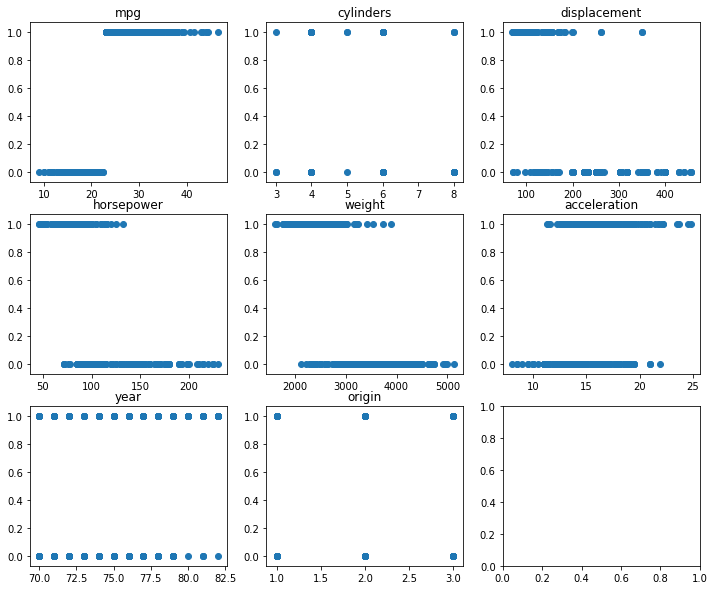

In [5]:
fig_scatter, axs = plt.subplots(3,3, figsize=(12,10))

for feature, ax in zip(features_to_plot, axs.flatten()):
    ax.scatter(auto_df[feature], auto_df['mpg01'])
    ax.set_title(feature)
    
plt.show()

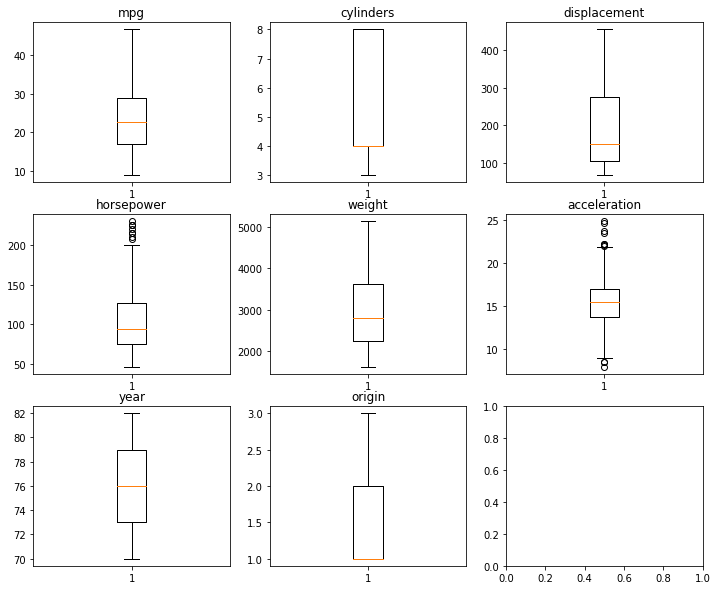

In [6]:
fig_scatter, axs = plt.subplots(3,3, figsize=(12,10))

for feature, ax in zip(features_to_plot, axs.flatten()):
    ax.boxplot(auto_df[feature])
    ax.set_title(feature)
    
plt.show()

From the graphs (mostly, from the middle-centered or extreme-centered behaviour in boxplot graphs), **weight, displacement, cylinders and origin** appear to be the most useful features to  predict _mpg01_. Confirming with the correlation we got:

In [7]:
auto_df.corr()['mpg01'].abs().nlargest(6)

mpg01           1.000000
mpg             0.836939
cylinders       0.759194
weight          0.757757
displacement    0.753477
horsepower      0.667053
Name: mpg01, dtype: float64

#### **11.c Split the data into a training set and a test set.**

In [8]:
# Using useful features for learning process
auto_useful_df = auto_df.loc[:,['cylinders', 'weight', 'displacement', 'mpg01']]
auto_useful_df

,cylinders,weight,displacement,mpg01
0,8,3504,307.0,0
1,8,3693,350.0,0
2,8,3436,318.0,0
3,8,3433,304.0,0
4,8,3449,302.0,0
...,...,...,...,...
387,4,2790,140.0,1
388,4,2130,97.0,1
389,4,2295,135.0,1
390,4,2625,120.0,1


In [9]:
x = auto_useful_df.loc[:,auto_useful_df.columns != 'mpg01']
y = auto_useful_df.loc[:,'mpg01']

print(x)
print(y)

     cylinders  weight  displacement
0            8    3504         307.0
1            8    3693         350.0
2            8    3436         318.0
3            8    3433         304.0
4            8    3449         302.0
..         ...     ...           ...
387          4    2790         140.0
388          4    2130          97.0
389          4    2295         135.0
390          4    2625         120.0
391          4    2720         119.0

[392 rows x 3 columns]
0      0
1      0
2      0
3      0
4      0
      ..
387    1
388    1
389    1
390    1
391    1
Name: mpg01, Length: 392, dtype: int64


In [10]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=123)
print("x_train size:", len(x_train))
print("x_test size:", len(x_test))
print("y_train size:", len(y_train))
print("y_test size:", len(y_test))

x_train size: 294
x_test size: 98
y_train size: 294
y_test size: 98


#### **11.f Perform logistic regression on the training data in order to predict _mpg01_ using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained**

With the separated data in training and testing sets, we procede to apply directly the Logistic Regression model.

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error

lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

/home/luis/Documentos/Programación/python/Topicos_II/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


And using a metrics-joining function, the classification presicion will be evaluated.

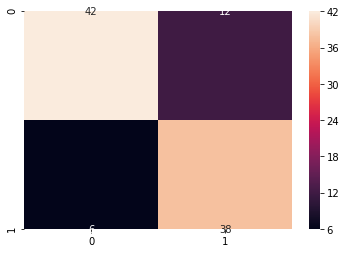

> Train score: 89.8%
> Test score: 81.63%
> TP: 38 (47.5%)
> TN: 42 (52.5%)
> FP: 12 (66.67%)
> FN: 6 (33.33%)
> Test error: 0.1836734693877551


In [12]:
import seaborn as sns

def show_training_result(lr_arg):
    cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
    tn, fp, fn, tp = cm.ravel()
    metrics = {
        "True Positive":tp,
        "True Negative":tn,
        "False Positive":fp,
        "False Negative":fn
    }
    
    train_score = lr_arg.score(x_train, y_train)
    test_score = lr_arg.score(x_test, y_test)
    
    sns.heatmap(cm, annot=True)
    plt.show()
    
    print("> Train score: {}%".format(round(100*train_score, 2)))
    print("> Test score: {}%".format(round(100*test_score, 2)))
    print("> TP: {} ({}%)".format(tp,round(100*tp/(tp+tn), 2)))
    print("> TN: {} ({}%)".format(tn,round(100*tn/(tp+tn), 2)))
    print("> FP: {} ({}%)".format(fp,round(100*fp/(fp+fn), 2)))
    print("> FN: {} ({}%)".format(fn,round(100*fn/(fp+fn), 2)))
    print("> Test error: {}".format(mean_absolute_error(y_test, y_pred)))
    
show_training_result(lr)

From this we can say that the sets are correctly balanced in order to perform a descent classification using logistic regression, suporting this statement in the high precision of the results. I can evaluate the results of omitting one of the useful features from the list, checking if the value of the classification improves:

/home/luis/Documentos/Programación/python/Topicos_II/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


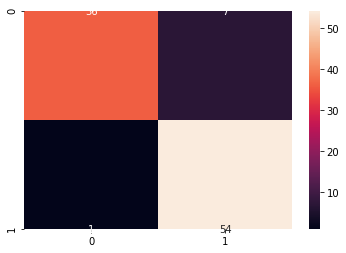

> Train score: 88.44%
> Test score: 91.84%
> TP: 54 (60.0%)
> TN: 36 (40.0%)
> FP: 7 (87.5%)
> FN: 1 (12.5%)
> Test error: 0.08163265306122448


In [13]:
# Not considering 'cylinders'
x = auto_useful_df.loc[:,(auto_useful_df.columns != 'mpg01') & (auto_useful_df.columns != 'cylinders')]
y = auto_useful_df.loc[:,'mpg01']
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=321)

lr_2 = LogisticRegression()
lr_2.fit(x_train, y_train)
y_pred = lr_2.predict(x_test)
show_training_result(lr_2)

/home/luis/Documentos/Programación/python/Topicos_II/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


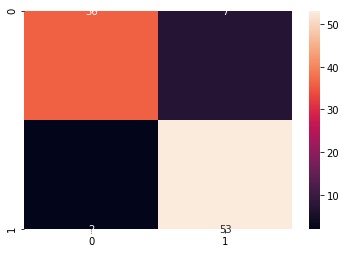

> Train score: 88.44%
> Test score: 90.82%
> TP: 53 (59.55%)
> TN: 36 (40.45%)
> FP: 7 (77.78%)
> FN: 2 (22.22%)
> Test error: 0.09183673469387756


In [14]:
# Not considering weight'
x = auto_useful_df.loc[:,(auto_useful_df.columns != 'mpg01') & (auto_useful_df.columns != 'weight')]
y = auto_useful_df.loc[:,'mpg01']
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=321)

lr_2 = LogisticRegression()
lr_2.fit(x_train, y_train)
y_pred = lr_2.predict(x_test)
show_training_result(lr_2)

/home/luis/Documentos/Programación/python/Topicos_II/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


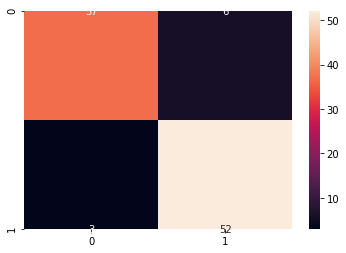

> Train score: 89.46%
> Test score: 90.82%
> TP: 52 (58.43%)
> TN: 37 (41.57%)
> FP: 6 (66.67%)
> FN: 3 (33.33%)
> Test error: 0.09183673469387756


In [15]:
# Not considering 'displacement'
x = auto_useful_df.loc[:,(auto_useful_df.columns != 'mpg01') & (auto_useful_df.columns != 'displacement')]
y = auto_useful_df.loc[:,'mpg01']
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=321)

lr_2 = LogisticRegression()
lr_2.fit(x_train, y_train)
y_pred = lr_2.predict(x_test)
show_training_result(lr_2)

So, eventho the precision (R-squared metric) is decent when using all three features, actually using pair-wise agroupations of them rises the score (and hence, minimize the error).

In conclusion, the hypothesis from part b) about using this features ('cylinders', 'weight', 'displacement') was correct, but the classification actually have an enhacement property when using only two of the three at the time. This is due the correlation between them:

In [16]:
auto_df.corr().loc[['cylinders', 'weight', 'displacement'],['cylinders', 'weight', 'displacement']]

,cylinders,weight,displacement
cylinders,1.000000,0.897527,0.950823
weight,0.897527,1.000000,0.932994
displacement,0.950823,0.932994,1.000000


The correlation between them is really high, high enoguh that when ignoring one of them actually improves the model due avoiding overfitting. A really interesting result if may I say.